In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path_to_data = '../data/serenelli2017/serenelli2017_low-mass.csv'

data = pd.read_csv(path_to_data)

In [3]:
data.head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR,Teff_SDSS,eTeff_SDSS,[M/H]_SDSS,...,-elogg_ASPC,sylogg_ASPC,rho_ASPC,+erho_ASPC,-erho_ASPC,syrho_ASPC,Age_ASPC,+eAge_ASPC,-eAge_ASPC,syAge_ASPC
0,2450729,1053.105,114.904,61.910,2.539,28.9,1.470,6029.0,59.0,-0.212,...,-0.021,0.007,0.2035,0.015640,-0.015730,0.002757,7.724,1.051,-0.953,1.221
1,2991448,1111.248,18.148,61.732,0.899,92.6,1.609,5836.0,70.0,-0.085,...,-0.007,0.006,0.2051,0.004721,-0.004561,0.002617,9.407,1.111,-1.002,1.260
2,3223000,2573.222,563.234,110.919,1.662,32.4,1.102,6198.0,47.0,-0.185,...,-0.012,0.009,0.6710,0.020120,-0.019880,0.005003,8.981,2.030,-1.665,2.148
3,3241581,2807.592,395.565,123.412,2.821,30.0,1.105,5770.0,81.0,0.185,...,-0.015,0.008,0.8334,0.042660,-0.033250,0.005770,8.876,2.209,-1.990,3.360
4,3427720,2726.381,56.767,120.045,0.120,963.8,1.125,6023.0,51.0,-0.037,...,-0.007,0.006,0.7888,0.001847,-0.002331,0.006548,3.980,1.171,-1.132,1.400


In [5]:
path_to_models = '../data/tracks/grid1_Dm0.04_MLT1.9_MS.csv'

models_ms = pd.read_csv(path_to_models)

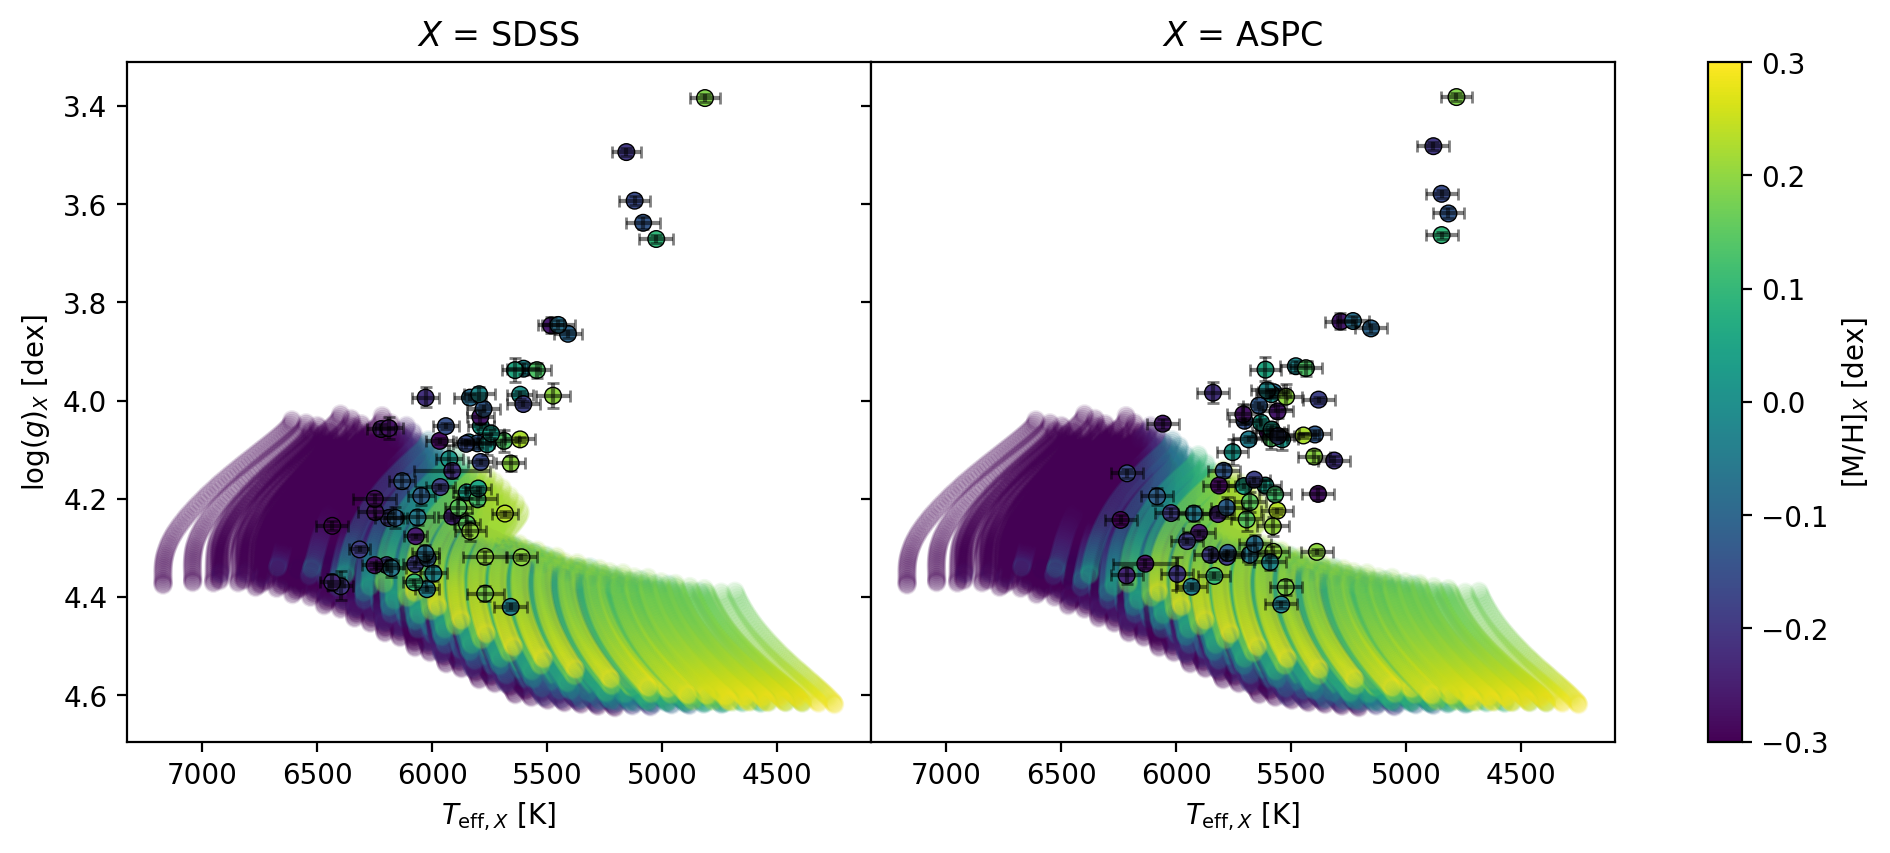

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5), dpi=200., sharex=True, sharey=True,
                       gridspec_kw=dict(wspace=0.))

for i, survey in enumerate(['SDSS', 'ASPC']):
    # data.plot(ax=ax, kind='scatter', x=f'Mass_{survey}', y=f'[M/H]_{survey}')    
    model_color = models_ms['star_feh'].to_numpy().T
    ax[i].scatter(*models_ms[['effective_T', 'log_g']].to_numpy().T,
                  c=model_color, cmap='viridis', vmin=-0.3, vmax=0.3, alpha=0.1)
    
    color = data[f'[M/H]_{survey}'].to_numpy().T
    ax[i].errorbar(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                yerr=abs(data[[f'-elogg_{survey}', f'+elogg_{survey}']]).to_numpy().T,
                xerr=abs(data[f'eTeff_{survey}']).to_numpy(),
                fmt='none', color='k', capsize=2, alpha=0.5)
    s = ax[i].scatter(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                      c=color, cmap='viridis', vmin=-0.3, vmax=0.3,
                      edgecolor='k', linewidths=0.5)
    
    ax[i].set_xlabel(r'$T_{\mathrm{eff}, X}$ [K]')
    ax[i].set_title(r'$X$ = ' + f'{survey}')


ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].set_ylabel(r'$\log(g)_X$ [dex]')

fig.colorbar(s, ax=ax.ravel().tolist(), label=f'[M/H]$_X$ [dex]')

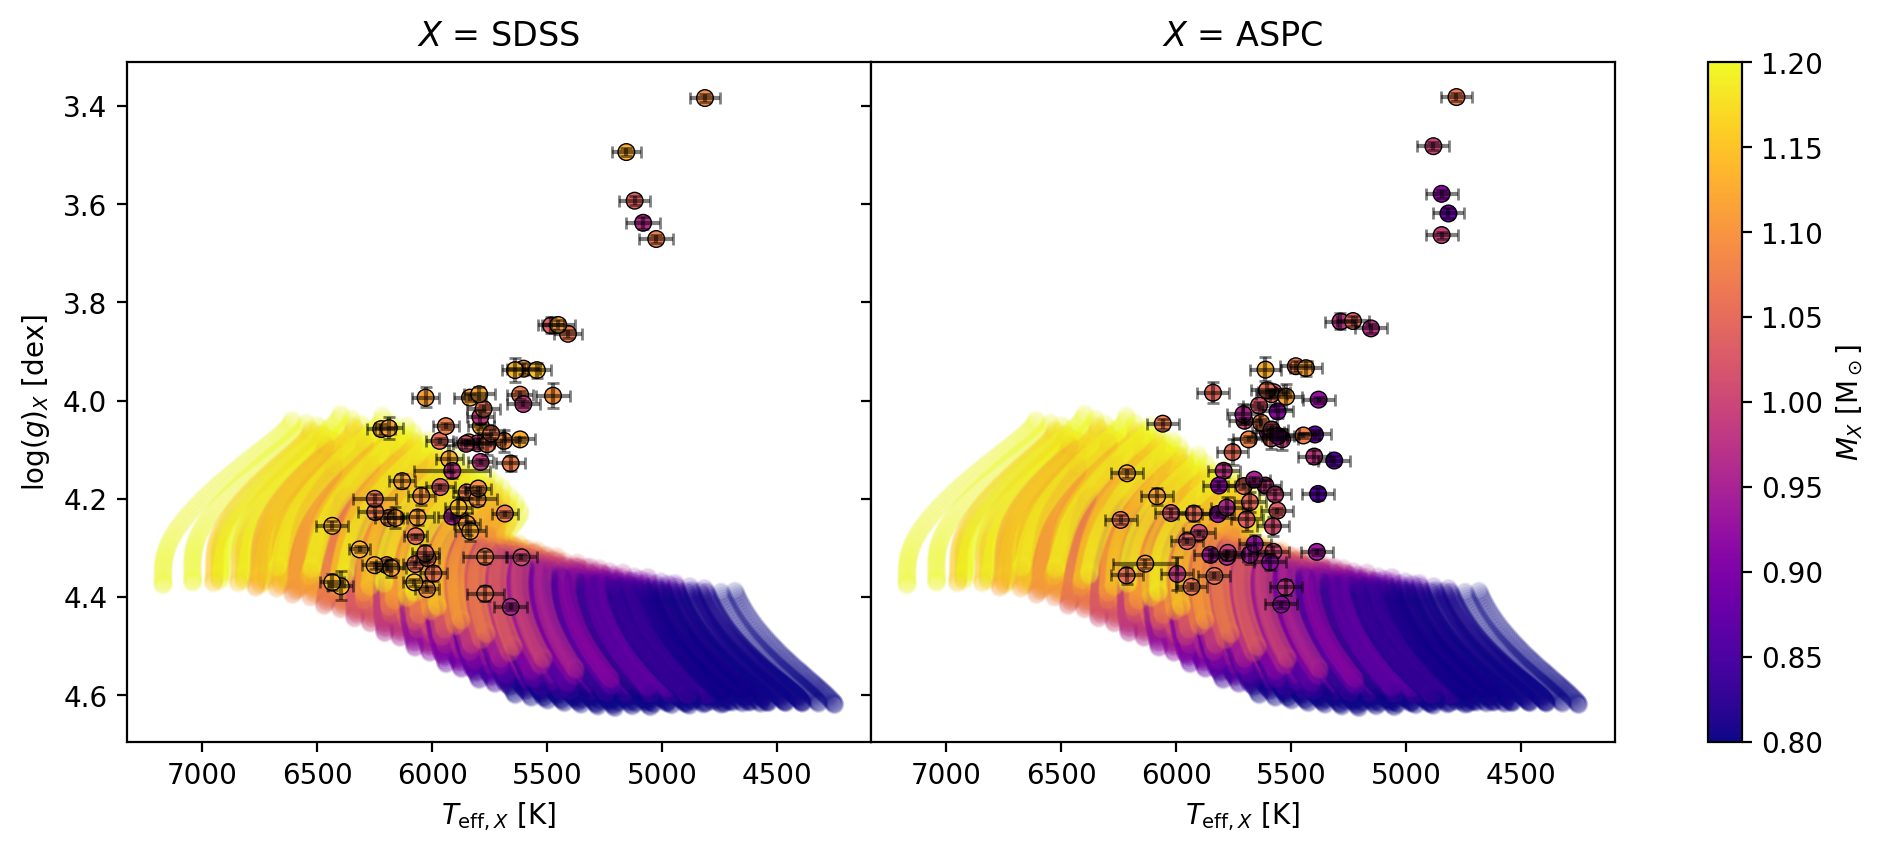

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5), dpi=200., sharex=True, sharey=True,
                       gridspec_kw=dict(wspace=0.))

for i, survey in enumerate(['SDSS', 'ASPC']):
    # data.plot(ax=ax, kind='scatter', x=f'Mass_{survey}', y=f'[M/H]_{survey}')    
    model_color = models_ms['inital_mass'].to_numpy().T
    ax[i].scatter(*models_ms[['effective_T', 'log_g']].to_numpy().T,
                  c=model_color, cmap='plasma', vmin=0.8, vmax=1.2, alpha=0.1)
    
    color = data[f'Mass_{survey}'].to_numpy().T
    ax[i].errorbar(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                yerr=abs(data[[f'-elogg_{survey}', f'+elogg_{survey}']]).to_numpy().T,
                xerr=abs(data[f'eTeff_{survey}']).to_numpy(),
                fmt='none', color='k', capsize=2, alpha=0.5)
    s = ax[i].scatter(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                      c=color, cmap='plasma', vmin=0.8, vmax=1.2, edgecolor='k',
                      linewidths=0.5)
    
    ax[i].set_xlabel(r'$T_{\mathrm{eff}, X}$ [K]')
    ax[i].set_title(r'$X$ = ' + f'{survey}')


ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].set_ylabel(r'$\log(g)_X$ [dex]')

fig.colorbar(s, ax=ax.ravel().tolist(), label=f'$M_X$ ' + r'$[\mathrm{M}_\odot]$')

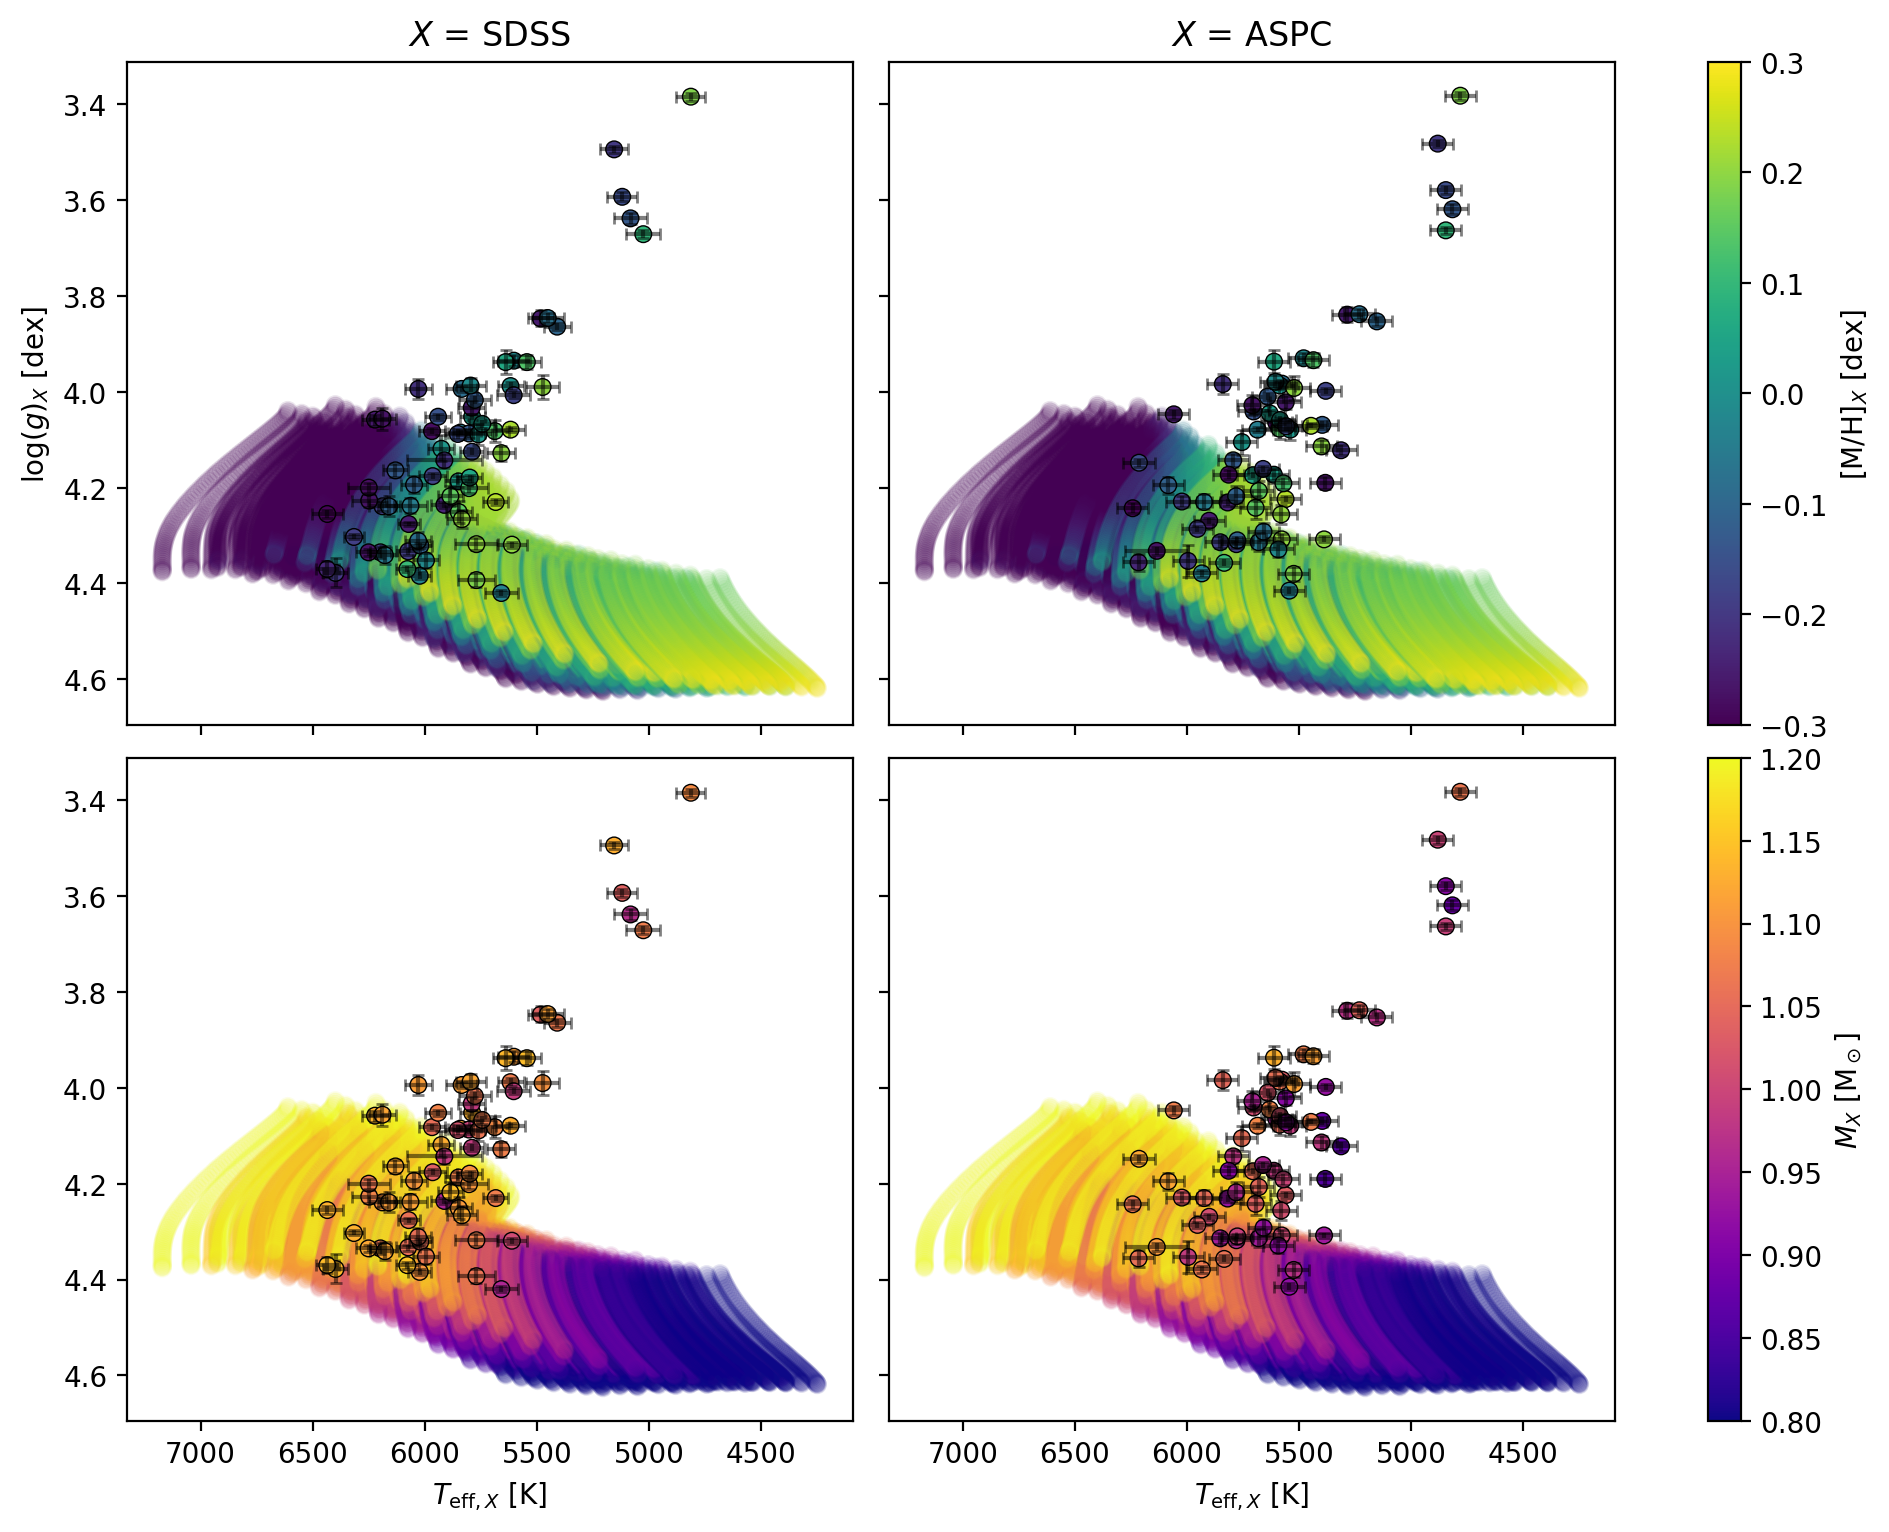

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9), dpi=200., sharex=True, sharey=True,
                       gridspec_kw=dict(wspace=0.05, hspace=0.05))

for i, survey in enumerate(['SDSS', 'ASPC']):
    model_color = models_ms['star_feh'].to_numpy().T
    ax[0, i].scatter(*models_ms[['effective_T', 'log_g']].to_numpy().T,
                  c=model_color, cmap='viridis', vmin=-0.3, vmax=0.3, alpha=0.1)
    
    color = data[f'[M/H]_{survey}'].to_numpy().T
    ax[0, i].errorbar(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                yerr=abs(data[[f'-elogg_{survey}', f'+elogg_{survey}']]).to_numpy().T,
                xerr=abs(data[f'eTeff_{survey}']).to_numpy(),
                fmt='none', color='k', capsize=2, alpha=0.5)
    s0 = ax[0, i].scatter(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                      c=color, cmap='viridis', vmin=-0.3, vmax=0.3,
                      edgecolor='k', linewidths=0.5)
    
    
    model_color = models_ms['inital_mass'].to_numpy().T
    ax[1, i].scatter(*models_ms[['effective_T', 'log_g']].to_numpy().T,
                  c=model_color, cmap='plasma', vmin=0.8, vmax=1.2, alpha=0.1)
    
    color = data[f'Mass_{survey}'].to_numpy().T
    ax[1, i].errorbar(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                yerr=abs(data[[f'-elogg_{survey}', f'+elogg_{survey}']]).to_numpy().T,
                xerr=abs(data[f'eTeff_{survey}']).to_numpy(),
                fmt='none', color='k', capsize=2, alpha=0.5)
    s1 = ax[1, i].scatter(*data[[f'Teff_{survey}', f'logg_{survey}']].to_numpy().T,
                      c=color, cmap='plasma', vmin=0.8, vmax=1.2, edgecolor='k',
                      linewidths=0.5)
    
    ax[1, i].set_xlabel(r'$T_{\mathrm{eff}, X}$ [K]')
    ax[0, i].set_title(r'$X$ = ' + f'{survey}')


ax[0, 0].invert_xaxis()
ax[0, 0].invert_yaxis()
ax[0, 0].set_ylabel(r'$\log(g)_X$ [dex]')

fig.colorbar(s0, ax=ax[0].ravel().tolist(), label=r'[M/H]$_X$ [dex]')
fig.colorbar(s1, ax=ax[1].ravel().tolist(), label=r'$M_X$ ' + r'$[\mathrm{M}_\odot]$')